# Credit Card Fraud Detection

The credit card fraud detection dataset from Kaggle was utilized for this analysis. Initially, data cleaning and exploratory data analysis (EDA) were performed to understand the structure and main characteristics of the dataset. Subsequently, supervised classification models, specifically Random Forest Classifier and XGBoost Classifier, were implemented to predict fraudulent transactions. These models were evaluated using accuracy, precision, recall, and F1-score metrics to assess their performance comprehensively.

However, due to the significant class imbalance and the difficulty of obtaining precise labels in some scenarios, the Class column was removed to approach the problem from an unsupervised perspective. To this end, the Isolation Forest model was implemented, which enables anomaly detection without the need for labels, aiming to identify potentially fraudulent transactions based solely on the behavior of the data.

---

## Library Import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [158]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv") 

In [159]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


---

## Data Preparation

In [134]:
# Number of rows
df.shape[0]

284807

In [136]:
# Columns and Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We change the **Time** variable type from **float64** to **datetime**

In [139]:
# Conversion of Time from float64 to datetime
df['Time'] = pd.to_datetime(df['Time'])
print('Time datatype:', df['Time'].dtype)

df.head(2)

Time datatype: datetime64[ns]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1970-01-01,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [25]:
# Statistical summary of the columns
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1970-01-01 00:00:00.000094813,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
min,1970-01-01 00:00:00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,1970-01-01 00:00:00.000054201,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1970-01-01 00:00:00.000084692,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1970-01-01 00:00:00.000139320,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,1970-01-01 00:00:00.000172792,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000
std,NaN,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527


In [27]:
# Identify NULL values in the data frame
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
# Obtaining number of duplicate data in the data frame
df.duplicated().sum()

1081

We can see that there are 1081 duplicate records out of the total of 284,807 records in the data set, in this case it is assumed that they are records that represent real recurring transactions and therefore it will not be necessary to eliminate these records.

---

## Exploratory Data Analysis (EDA)

We will identify the number of fraudulent and non fraudulent records in our labeled dataset.
- Class 0 = Normal Transactions
- Class 1 = Fraudulent Transactions

In [48]:
# Number of transactions records per Class
count_class = df['Class'].value_counts()
print('Normal Transactions:     ', count_class[0])
print('Fraudulent Transactions: ', count_class[1])

Normal Transactions:      284315
Fraudulent Transactions:  492


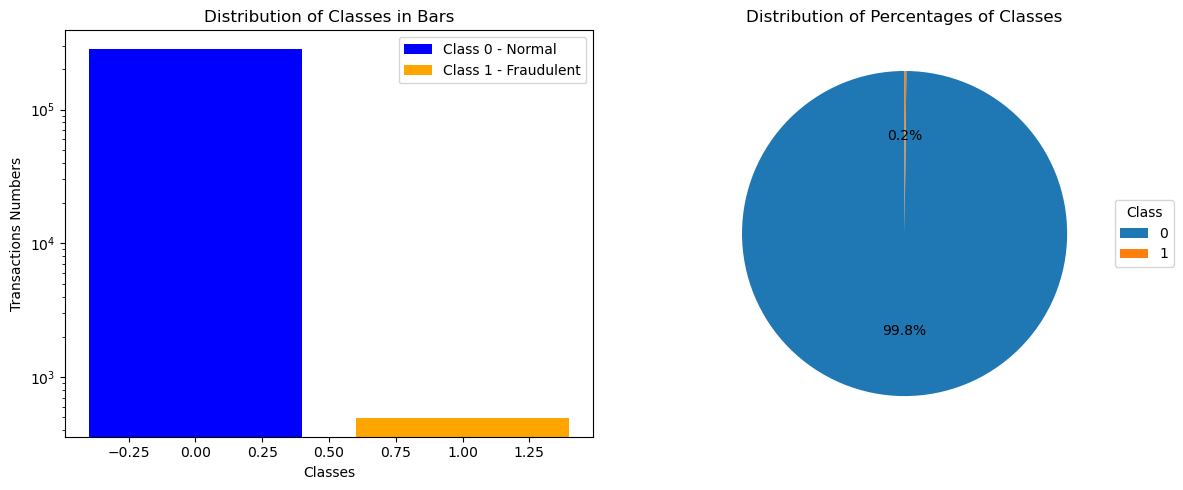

In [50]:
# Plots of number and percentage of transaction records by Class
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.bar(count_class.index, count_class.values, label = ['Class 0 - Normal', 'Class 1 - Fraudulent'], color = ['blue', 'orange'])
ax1.set_title('Distribution of Classes in Bars')
ax1.set_xlabel('Classes')
ax1.set_ylabel('Transactions Numbers')
ax1.set_yscale('log')
ax1.legend()
plt.tight_layout()

wedges, texts, autotexts = ax2.pie(count_class.values, labels = None, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribution of Percentages of Classes')
ax2.legend(wedges, df.index, title='Class', loc='center left', bbox_to_anchor=(1, 0.5))

Note that only **0.2%** of the transactions represent fraudulent credit card transactions in our labeled data set. This represents an extremely ** imbalance dataset** between normal and fraudulent transactions.

The total sum of the transactions per class 0 and 1 will be calculated to compare the results of the amounts.

In [54]:
print('Total Amount Sum: ', df['Amount'].sum())

Total Amount Sum:  25162590.009999998


The total sum amount of the transactions is : **<br>25162590.009999998</br>**

In [57]:
#Total Amount per class
tot_amount_class = df.groupby('Class')['Amount'].sum()
tot_amount_class.to_frame(name = 'Total Amount per Class')

,Total Amount per Class
Class,
0,25102462.04
1,60127.97


**Top 5** amount of transactions of **Class 0**, Normal Transactions

In [60]:
# Top 5 amount of transactions of Class 0, Normal Transactions
top_amount_0 = df[df['Class'] == 0][['Amount']]
top_amount_0 = top_amount_0.nlargest(5, 'Amount')
top_amount_0.index = [f"{i + 1}" for i in range(len(top_amount_0))]
top_amount_0

,Amount
1,25691.16
2,19656.53
3,18910.00
4,12910.93
5,11898.09


**Top 5** amount of transactions of **Class 1**, Fraudulent Transactions

In [63]:
# Top 5 amount of transactions of Class 1, Fraudulent Transactions
top_amount_1 = df[df['Class'] == 1][['Amount']]
top_amount_1 = top_amount_1.nlargest(5, 'Amount')
top_amount_1.index = [f"{i + 1}" for i in range(len(top_amount_1))]
top_amount_1

,Amount
1,2125.87
2,1809.68
3,1504.93
4,1402.16
5,1389.56


Text(0, 0.5, 'Top 5')

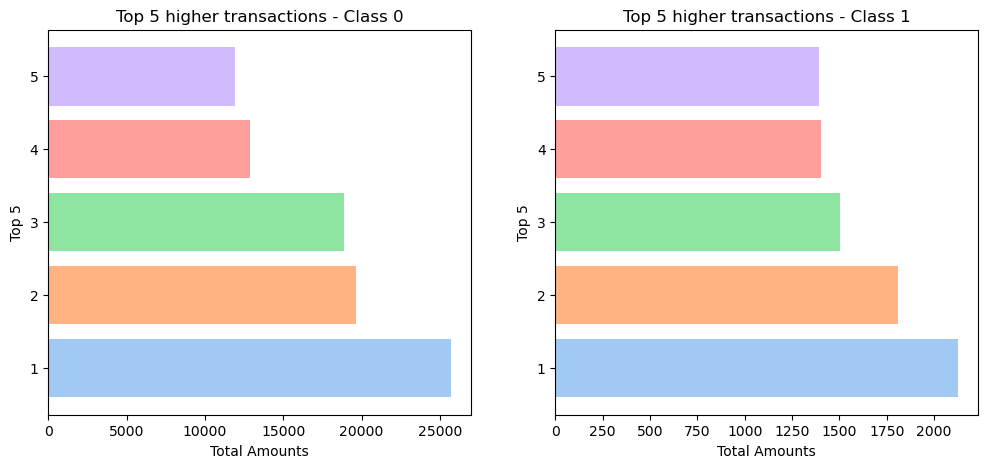

In [65]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,5))

colors_0 = sns.color_palette("pastel", len(top_amount_0))
colors_1 = sns.color_palette("pastel", len(top_amount_1))

ax0.barh(top_amount_0.index, top_amount_0['Amount'], color = colors_0)
ax0.set_title('Top 5 higher transactions - Class 0')
ax0.set_xlabel('Total Amounts')
ax0.set_ylabel('Top 5')

ax1.barh(top_amount_1.index, top_amount_1['Amount'], color = colors_1)
ax1.set_title('Top 5 higher transactions - Class 1')
ax1.set_xlabel('Total Amounts')
ax1.set_ylabel('Top 5')

#plt.tight_layout()

We can observe that the top 5 of the amounts of normal transactions have a very significant difference to the top 5 of fraudulent transactions.

This indicates that the maximum amounts of fraudulent transactions do not represent significant values in relation to normal transactions.

   Class      Amount
0      0   88.291022
1      1  122.211321


Text(0.5, 1.0, 'Average of the total Sum of the Amounts per Class')

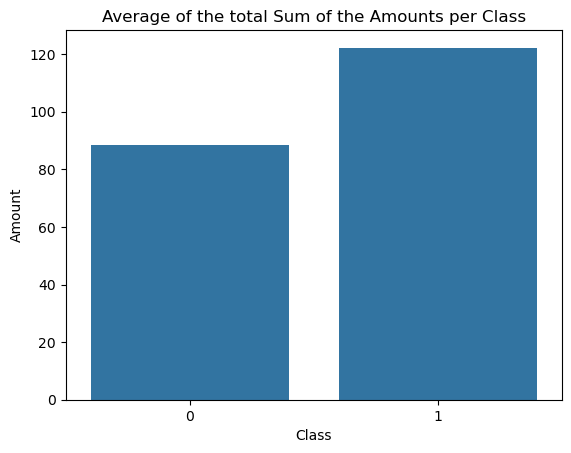

In [88]:
# Average of the sum of transaction amounts by class
amount_means = df.groupby('Class')['Amount'].mean().reset_index()
print(amount_means)
sns.barplot(data = amount_means, x = 'Class', y = 'Amount')
plt.title('Average of the total Sum of the Amounts per Class')

We can observe that the **average** number of transactions made in **Class 0 - Normal is 88.29**, while the average number of transactions in **Class 1 - fraudulent is 122.21**. Although the Class 1 average is higher, it **does not represent a significant amount** for the number of DataSet transactions.

Text(0.5, 1.0, 'Total amount distribution per class')

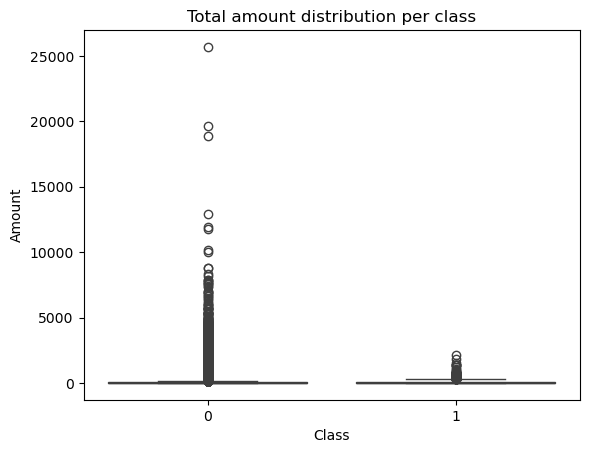

In [90]:
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Total amount distribution per class')

### Correlation Matrix

<Axes: >

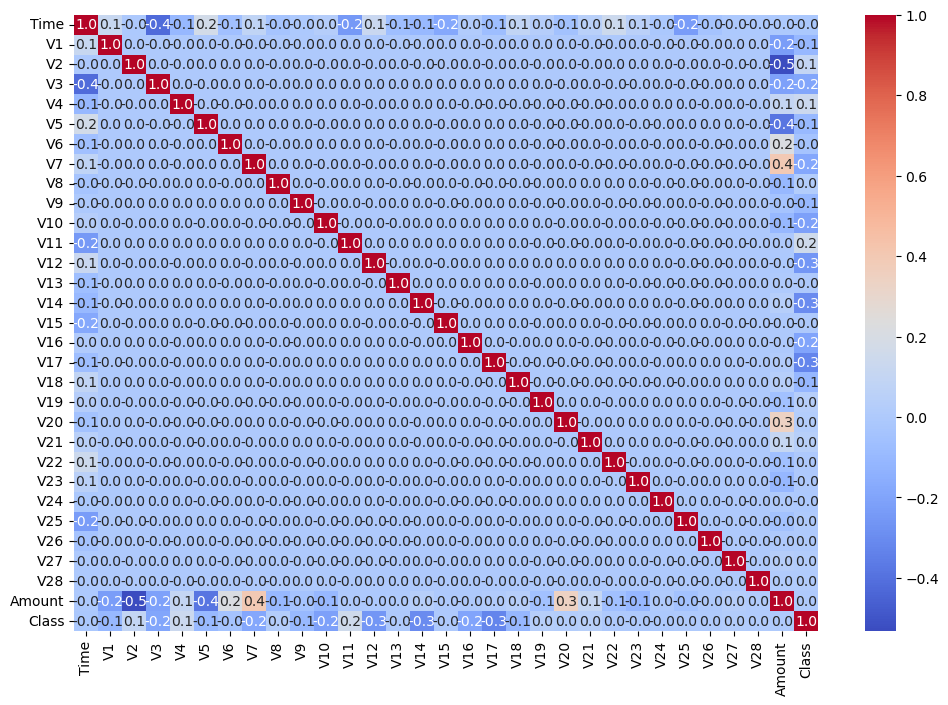

In [93]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='coolwarm')

---

## Model Development - Supervised Models

The credit card fraud detection dataset from Kaggle was utilized for this analysis. Initially, data cleaning and exploratory data analysis (EDA) were performed to understand the structure and main characteristics of the dataset. Subsequently, supervised classification models, specifically Random Forest Classifier and XGBoost Classifier, were implemented to predict fraudulent transactions.

However, due to the significant class imbalance and the difficulty of obtaining precise labels in some scenarios, the Class column was removed to approach the problem from an unsupervised perspective. To this end, the Isolation Forest model was implemented, which enables anomaly detection without the need for labels, aiming to identify potentially fraudulent transactions based solely on the behavior of the data.

The original dataset of the case study has extreme class imbalance (with only **0.2%** of transactions labeled as **fraudulent**) which can severely affect model training and evaluation. A misclassification could achieve high accuracy by simply predicting all transactions as NOT fraudulent, but not detecting any actual fraud. To solve this problem, it is essential to use resampling techniques, appropriate evaluation metrics (such as **F1 score** and **recall**) as well as a class **balancing method**.

## <font color = blue> Random Forest Classifier </font>

In [100]:
# Data Preparation
X = df.select_dtypes(include = ['number']).drop('Class', axis = 1)
y = df['Class']

# Data division, training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model construction - model balance ("class_weight='balanced')
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 42, class_weight='balanced')

# Model training
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

#### Model Evaluation

In [103]:
rf_y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("F1 Score:", f1_score(y_test, rf_y_pred))
print("Recall:", recall_score(y_test, rf_y_pred))
print("Precision:", precision_score(y_test, rf_y_pred))

[[85285    22]
 [   19   117]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.86      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9995201479348805
F1 Score: 0.850909090909091
Recall: 0.8602941176470589
Precision: 0.841726618705036


- The confusion matrix reflects a total of **85285** well classified normal transactions and **22** normal transactions classified as fraud. 
The model did not detect **19** fraudulent transactions and finally detected **117** fraudulent transactions correctly.

- The model had a total **accuracy** of correct predictions of **99.95%**, it should be noted that since the model is extremely unbalanced it could have a very high accuracy because it predicts non-fraudulent transactions almost every time.

- High **precision**, few false positives, of the 100% of frauds reported, **84.17%** were actually frauds.

- **Recall**, the model detected **86.02%** of the total number of real frauds. It still missed frauds (19 cases).

- The **F1 Score** indicates that the model effectively identifies **85.09%** of positive cases and minimizes false positives, between precision and recall. It is especially valuable in inbalanced classification problems, such as fraud detection.

The model achieves a good balance between recall and accuracy, improving the fraudulent transaction detection rate to 86.0%, while accepting an increase in false positives. This balance usually represents a more realistic and actionable result in fraud detection, where it is critical to minimize undetected fraud cases, even if this results in a higher false alarm rate.

## <font color = blue> XGBoost Classifier </font>

For XGBoost it will not be necessary to apply a class balancing method like “scale_pos_weight” since it optimizes lossy functions (like log-loss) directly, and can learn well even in the presence of imbalance without being forced to artificially weight.

In [112]:
# Data Preparation
X = df.select_dtypes(include = ['number']).drop('Class', axis = 1)
y = df['Class']

# Data division, training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculates the class ratio for model balancing
#negatives = sum(y_train == 0)
#positives = sum(y_train == 1)
#scale_pos_weight = negatives / positives * 0.5

# Model construction
xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.05, max_depth = 4, random_state = 42)

# Model training
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

#### Model Evaluation

In [115]:
xgb_y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, xgb_y_pred))
print(classification_report(y_test, xgb_y_pred))

print("Accuracy:", accuracy_score(y_test, xgb_y_pred))
print("F1 Score:", f1_score(y_test, xgb_y_pred))
print("Recall:", recall_score(y_test, xgb_y_pred))
print("Precision:", precision_score(y_test, xgb_y_pred))

[[85302     5]
 [   23   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.83      0.89       136

    accuracy                           1.00     85443
   macro avg       0.98      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9996722961506501
F1 Score: 0.889763779527559
Recall: 0.8308823529411765
Precision: 0.9576271186440678


The XGBoost model, without manual class balancing, achieves an excellent balance between fraud detection and minimizing false alerts. With a high **precision** of **95.8%**, a strong **recall** of **83.1%**, and an **F1 Score** of **0.89%**, the model has an outstanding balance between accuracy and recall. This is ideal for real-world environments where fraud must be detected without generating many false alarms and demonstrates solid performance in detecting infrequent fraudulent transactions while maintaining operational reliability. This model is ideally suited for deployment in a production environment where both detection and user confidence are critical.

---

## Model Development - Unsupervised Models

We will remove the **Class** column, to simulate that the data is **not labeled**, in order to create and train **unsupervised models** for the classification of transactions in defined clusters and outlier detection.
The **Time** column will also be eliminated, since it is not useful in the construction of the model.

In [162]:
# Removing the Class and Time columns
df = df.drop(['Class', 'Time'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [164]:
# DataFrmae Columns
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

### Data Normalization

All data frame variables are **normalized** to have similar scaled values.

In [170]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(df)

### PCA - Dimentionality Reduction

We will analyze the **cumulative explained variance** to determine the minimum number of **principal components** required to retain a satisfactory level of information from the original dataset. This approach helps ensure dimensionality is reduced efficiently without significant loss of data integrity.

Given the large number of variables in our dataset, we will apply **Principal Component Analysis (PCA)** to reduce its dimensionality. This technique allows us to simplify the structure of the data while preserving as much relevant information as possible.

In [203]:
from sklearn.decomposition import PCA

# Adjust PCA without reducing components
pca = PCA().fit(X_scaled)

# Calculate the cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Identify the minimum number of components that explain at least 90% of the variance.
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1  # +1 because the indexes start at 0
print(f"Minimum number of components to explain 90% of the variance: {n_components_90}")

Minimum number of components to explain 90% of the variance: 26


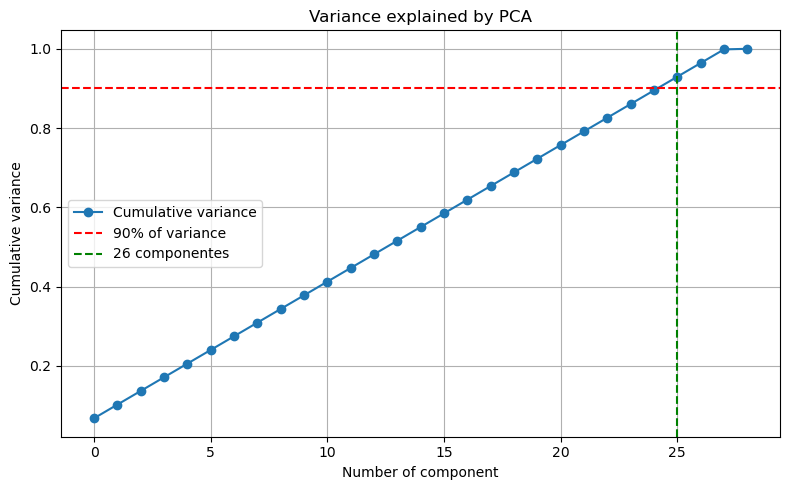

In [213]:
# Cumulative variance chart
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o', label = 'Cumulative variance')
plt.axhline(y = 0.90, color='r', linestyle='--', label = '90% of variance')
plt.axvline(x = n_components_90-1, color = 'g', linestyle ='--', label = f'{n_components_90} componentes')
plt.xlabel('Number of component')
plt.ylabel('Cumulative variance')
plt.title('Variance explained by PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The minimum number of **components that explain the variance** at **90%** is **26**, therefore for this case **we will not perform PCA** to our data frame since originally our df has 28 variables (V1...V28) + amount so reducing the dimensionality to 26 does not gain much by doing the reduction and interpretability is lost.

## <font color = 'blue'>Insolation Forest </font>

In [224]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [245]:
# Initializes the Isolation Forest model
# n_estimators = 100 - number of trees
# contamination = 0.0017 - estimated proportion of anomalies (~frauds)
iso_forest = IsolationForest(n_estimators = 100, contamination = 0.0017, random_state = 42)

# Adjust the model
iso_forest.fit(X_scaled)

# Predictions: -1 for anomalies, 1 for normal
y_pred = iso_forest.predict(X_scaled)
scores = iso_forest.decision_function(X_scaled)

X_scaled_df = pd.DataFrame(X_scaled, columns = df.columns)

X_scaled_df['anomaly'] = y_pred
X_scaled_df['anomaly_score'] = scores

Anomalies are detected in the column anomaly:
- Anomalies: -1
- Normal: 1

In [247]:
X_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,anomaly,anomaly_score
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,1,0.283394
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,1,0.300717
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,1,0.211445
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,1,0.266173
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,1,0.284356


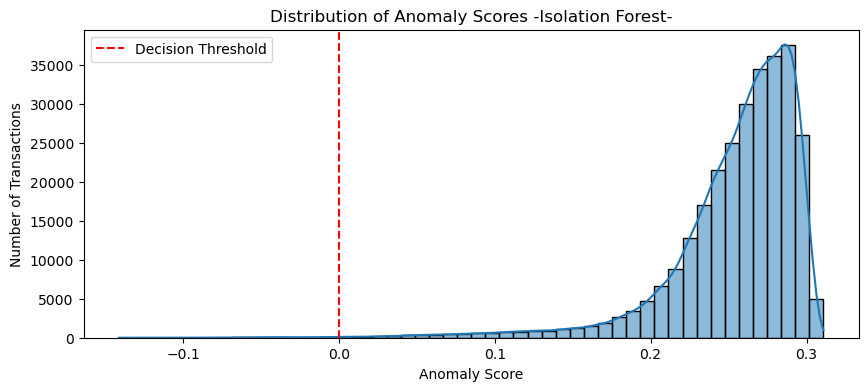

In [285]:
plt.figure(figsize=(10, 4))
sns.histplot(X_scaled_df['anomaly_score'], bins = 50, kde = True)
plt.title('Distribution of Anomaly Scores -Isolation Forest-')
plt.xlabel('Anomaly Score')
plt.ylabel('Number of Transactions')
plt.axvline(0, color = 'red', linestyle = '--', label = 'Decision Threshold')
plt.legend()
plt.show()

In [261]:
total_anomalies = (X_scaled_df['anomaly'] == -1).sum()
print(f"Total anomalies detected: {total_anomalies}")

no_anomalies = (X_scaled_df['anomaly'] == 1).sum()
print(f"Total of NO anomalies detected: {no_anomalies}")

Total anomalies detected: 485
Total of NO anomalies detected: 284322


The model was trained without using the actual labels (Class) and set with a parameter of contamination = 0.0017, which reflects the expected proportion of frauds in the dataset.
The model detected a total of **485 anomalies** among 284,807 transactions, which is consistent with the actual **proportion of fraud (0.17%)**.


---

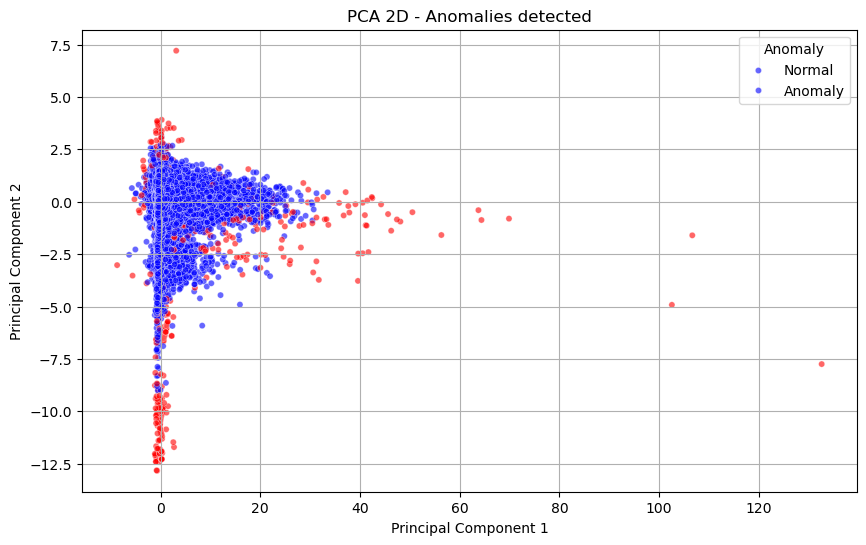

In [307]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

df_pca['Anomaly'] = (y_pred == -1).astype(int)

plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_pca ,x = 'PC1', y = 'PC2', hue = 'Anomaly', palette = {0: 'blue', 1: 'red'}, alpha = 0.6, s = 20)
plt.title('PCA 2D - Anomalies detected')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Anomaly', labels = ['Normal', 'Anomaly'])
plt.grid(True)
plt.show()

---

## Conclusion

The credit card fraud detection project demonstrated the effectiveness of combining both supervised and unsupervised machine learning approaches to identify fraudulent transactions in a highly imbalanced dataset. Through comprehensive data preprocessing and exploratory data analysis, meaningful patterns and potential anomalies were uncovered. Supervised models such as Random Forest and XGBoost achieved exceptional performance, with XGBoost reaching an accuracy of 99.97% and a precision of 95.8%, indicating strong predictive power in recognizing fraudulent behavior.

To complement these models and simulate real-world scenarios where labels are not always available, the Class column was removed and the Isolation Forest algorithm was applied as an unsupervised method. This allowed for the detection of outliers solely based on transaction patterns, showcasing the value of anomaly detection techniques in fraud prevention.

Overall, the project highlights not only the importance of model accuracy but also the relevance of adaptability, interpretability, and the integration of different machine learning strategies to address critical challenges in financial security.